In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
sns.set()

sns.set_style("whitegrid")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.set_palette("GnBu_d")

%matplotlib inline

import os
cwd = os.getcwd()

SAVEDIR = "../plots/fermi-surface"
if not os.path.exists(SAVEDIR):
    os.makedirs(SAVEDIR)

# Compute the dispersion relation for the 1D chain and the square lattice

In [2]:
ksX =  np.pi * np.arange(-1, 1.001, 0.001)
ksY =  np.pi * np.arange(-1, 1.001, 0.001)
epsK = np.zeros((ksX.size, ksY.size))
for kX in range(ksX.size):
    for kY in range(ksY.size):
        epsK[kX, kY] = - 2 * ( np.cos(ksX[kX]) + np.cos(ksY[kY]) )
        
eps = np.zeros((ksX.size))
for kX in range(ksX.size):
    eps[kX] = - 2 * np.cos(ksX[kX])

# Dispersion relation in 1D

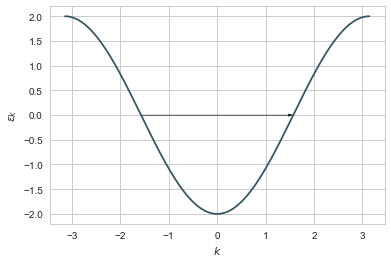

In [3]:
plt.plot(ksX, eps)
plt.arrow(-np.pi/2, 0, np.pi - 0.1, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.xlabel(r'$k$')
plt.ylabel(r'$\varepsilon_k$')
plt.savefig(SAVEDIR + "/fermiEnergy1D.png", dpi = 600)

# Dispersion relation in 2D and Fermi surfaces for different fillings

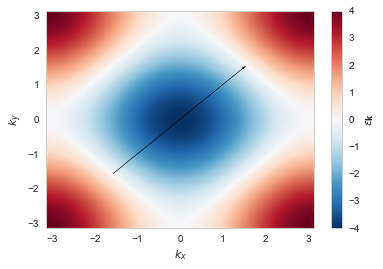

In [4]:
X, Y = meshgrid(ksX, ksY)

Z = epsK.T # has to be transposed to yield the right correspondence

fig, ax = plt.subplots()

p = ax.pcolormesh(X, Y, Z, cmap=cm.RdBu_r)
ax.arrow(-np.pi/2, -np.pi/2, np.pi - 0.1, np.pi- 0.1, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
cb = fig.colorbar(p)
cb.set_label(r'$\varepsilon_{\mathbf{k}}$')
plt.savefig(SAVEDIR + "/fermiEnergy2D.png", dpi = 600)